# Dog Breed Identification System Using Deep Learning 🐕

## Introduction

In this project we shall use Deep Learning to classify images according to dog breed. This is a multi-class classification problem with 120 classes. Each class has a limited number of images. We are provided with a training and test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. The goal of the project is to create a classifier capable of determining a dog's breed from a photo.

### Dataset

The dataset for this project is available on Kaggle. <br>

**Link** : https://www.kaggle.com/c/dog-breed-identification/data

### Evaluation

We shall use <code>Accuracy</code>, <code>Precision</code>, <code>Recall</code> and <code>F1 score</code> to evaluate the performance of our models.<br>

Kaggle submissions are evaluated on <code>Multi Class Log Loss</code> between the predicted probability and the observed target.

## Table of Contents

1. Environment Setup
2. Dataset Gathering
3. Exploratory Data Analysis
4. Dataset Preprocessing
5. Model Experimentation
6. Model Evaluation

## Environment Setup

In [1]:
# Suppressing Jupyter Notebook Warnings
import warnings
warnings.filterwarnings("ignore")

import os
import random

import tqdm

# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# scikit-learn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Deep Learning libraries
import tensorflow as tf
import tensorflow_hub as hub

import cv2

# Image display
from IPython.display import display, Image

## Dataset Gathering

In [2]:
# Importing the labels dataset
labels_csv = pd.read_csv('../input/dog-breed-identification/labels.csv')

# Viewing the head of the dataset
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
# Saving the training dataset path to a variable
train_path = "../input/dog-breed-identification/train/"

# Creating image paths from the name
filenames = [train_path + fname + ".jpg" for fname in labels_csv['id']]

# Viewing the first 10 filenames
filenames[:10]

['../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '../input/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '../input/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '../input/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '../input/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '../input/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [4]:
# Checking whether the number of filenames in the directory matches to that of ours
if len(os.listdir(train_path)) == len(filenames):
    print('Matched !')
else:
    print('Not matched !')

Matched !


## Exploratory Data Analysis

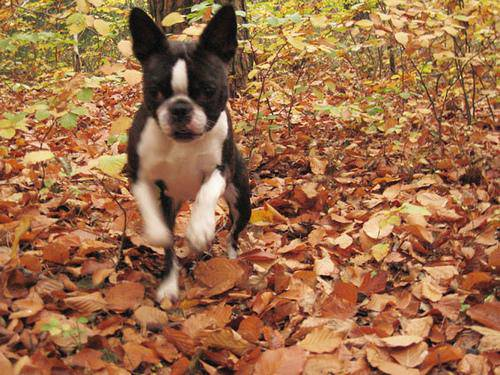

In [5]:
# Viewing an image using filename
Image("../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

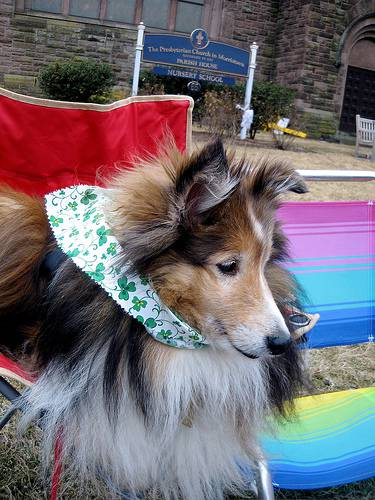

In [6]:
# Viewing an image using our filenames variable
Image(filenames[10])

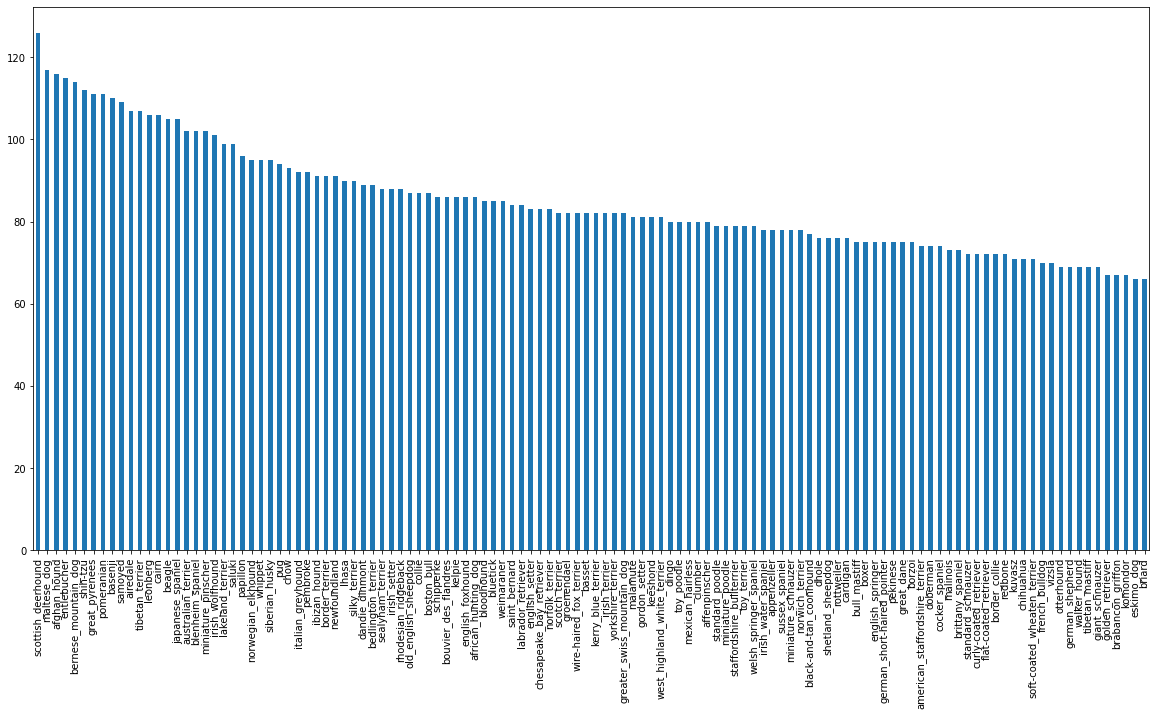

In [7]:
# Visualizing the distribution of images accoding to class
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

## Dataset Preprocessing

In [8]:
# Converting the label columns to Numpy array
labels = labels_csv['breed'].to_numpy()

# Viewing the first 10 labels
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [9]:
# Saving the count of total number of unique breeds to a variabkle
unique_breeds = np.unique(labels)

print("Total number of unique breeds : ", len(unique_breeds))

Total number of unique breeds :  120


In [10]:
# Converting the labels to a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]

# Viewing how it looks like
boolean_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [11]:
# Creating training and validation sets

# Separating the features and labels
X = filenames
y = boolean_labels

print(f"Number of training images: {len(X)}")
print(f"Number of labels: {len(y)}")

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)

print(f"Number of training images : {len(X_train)}")
print(f"Number of validation images : {len(X_val)}")

Number of training images: 10222
Number of labels: 10222
Number of training images : 8177
Number of validation images : 2045


### Image Preprocessing

In [12]:
# Reading an image in and checking shape
image = plt.imread(filenames[42])
print(f"Image Shape : {image.shape}")

# Converting the image to a Tensorflow Tensor
tf.constant(image)

Image Shape : (257, 350, 3)


2022-02-11 00:18:06.207786: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 00:18:06.309365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 00:18:06.310052: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-11 00:18:06.311905: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [13]:
# Setting the Image Size
IMAGE_SIZE = 224

# Creating a function to preprocess the images
def process_image(image_path):
    '''
    This function shall preprocess the image
    1. Read in the image file
    2. Turn the image into numerical tensor
    3. Convert the color channel values to 0-1
    4. Resize the image
    '''
    
    # 1. Read in the image
    image = tf.io.read_file(image_path)
    
    # 2. Turn the image into numerical tensors
    image = tf.image.decode_jpeg(image, channels=3)
    
    # 3. Convert the color channel values from 0-225 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # 4. Resize the image
    image = tf.image.resize(image, size=[IMAGE_SIZE, IMAGE_SIZE])
    
    return image

### Batching The Data

In [14]:
# Creating a function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label,
    processes the image and returns a tuple of (image, label).
    """
    image = process_image(image_path)
    return image, label

In [15]:
# Setting the batch size at 32 
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Function to batch the data
    """
    # If the data is a test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
  
    # If the data if a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        # If the data is a training dataset, we shuffle it
        print("Creating training data batches...")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                   tf.constant(y))) # labels
    
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))

        # Create (image, label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the data into batches
        data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [16]:
# Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [17]:
# Checking the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Model Experimentation

### MobileNetV2

In [18]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMAGE_SIZE, IMAGE_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

# Model URL for MobileNetV2
MODEL_URL1 = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

# Creating Tensorflow EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=5)

In [19]:
# Creating the MobileResNetV2 model
model1 = tf.keras.Sequential([
    # Layer 1 : Input Layer
    hub.KerasLayer(MODEL_URL1),
    
    # Layer 2 : Output Layer
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation='softmax')
])

# Compiling the model
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Building the model
model1.build(INPUT_SHAPE)

# Summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [20]:
# Fitting the model
history1 = model1.fit(train_data,
                      epochs=100,
                      validation_data=val_data,
                      callbacks=[early_stopping])

Epoch 1/100


2022-02-11 00:18:13.763833: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-11 00:18:17.978401: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


256/256 [==============================] - 62s 208ms/step - loss: 1.5313 - accuracy: 0.6336 - val_loss: 0.7146 - val_accuracy: 0.7966
Epoch 2/100
256/256 [==============================] - 23s 90ms/step - loss: 0.4191 - accuracy: 0.8778 - val_loss: 0.6492 - val_accuracy: 0.8132
Epoch 3/100
256/256 [==============================] - 23s 89ms/step - loss: 0.2392 - accuracy: 0.9373 - val_loss: 0.6544 - val_accuracy: 0.8015
Epoch 4/100
256/256 [==============================] - 23s 90ms/step - loss: 0.1543 - accuracy: 0.9658 - val_loss: 0.6557 - val_accuracy: 0.8098
Epoch 5/100
256/256 [==============================] - 23s 89ms/step - loss: 0.1036 - accuracy: 0.9814 - val_loss: 0.6641 - val_accuracy: 0.8064
Epoch 6/100
256/256 [==============================] - 23s 90ms/step - loss: 0.0744 - accuracy: 0.9890 - val_loss: 0.6767 - val_accuracy: 0.8117
Epoch 7/100
256/256 [==============================] - 23s 90ms/step - loss: 0.0541 - accuracy: 0.9946 - val_loss: 0.6805 - val_accuracy: 0.8

### EfficientNetV2

In [21]:
# Model URL for EfficientNetV2
MODEL_URL2 = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2'

# Creating model for EfficientNetV2
model2 = tf.keras.Sequential([
    # Layer 1 : Input Layer
    hub.KerasLayer(MODEL_URL2),
    
    # Layer 2 : Output Layer
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation='softmax')
])

# Compiling the model
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Building the model
model2.build(INPUT_SHAPE)

# Summary of the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1000)              7200312   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               120120    
Total params: 7,320,432
Trainable params: 120,120
Non-trainable params: 7,200,312
_________________________________________________________________


In [22]:
# Fitting the model
history2 = model2.fit(train_data,
                      epochs=100,
                      validation_data=val_data,
                      callbacks=[early_stopping])

Epoch 1/100
256/256 [==============================] - 30s 93ms/step - loss: 1.7131 - accuracy: 0.5800 - val_loss: 0.9728 - val_accuracy: 0.7134
Epoch 2/100
256/256 [==============================] - 25s 96ms/step - loss: 0.6775 - accuracy: 0.7985 - val_loss: 0.9094 - val_accuracy: 0.7364
Epoch 3/100
256/256 [==============================] - 24s 93ms/step - loss: 0.4718 - accuracy: 0.8565 - val_loss: 0.9434 - val_accuracy: 0.7369
Epoch 4/100
256/256 [==============================] - 25s 96ms/step - loss: 0.3382 - accuracy: 0.9022 - val_loss: 0.9485 - val_accuracy: 0.7403
Epoch 5/100
256/256 [==============================] - 24s 94ms/step - loss: 0.2509 - accuracy: 0.9362 - val_loss: 0.9751 - val_accuracy: 0.7355
Epoch 6/100
256/256 [==============================] - 23s 92ms/step - loss: 0.1966 - accuracy: 0.9523 - val_loss: 1.0041 - val_accuracy: 0.7350
Epoch 7/100
256/256 [==============================] - 24s 94ms/step - loss: 0.1541 - accuracy: 0.9654 - val_loss: 1.0166 - val_ac

### ResNet50V1

In [23]:
# Model URL for ResNet50V2
MODEL_URL3 = "https://tfhub.dev/tensorflow/resnet_50/classification/1"

# Creating the model for ResNet50V2
model3 = tf.keras.Sequential([
    # Layer 1 : Input Layer
    hub.KerasLayer(MODEL_URL3),
    
    # Layer 2 : Output Layer
    tf.keras.layers.Dense(120, activation='softmax')
])

# Compiling the model
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Building the model
model3.build(INPUT_SHAPE)

# Summary of the model
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1001)              25612201  
_________________________________________________________________
dense_2 (Dense)              (None, 120)               120240    
Total params: 25,732,441
Trainable params: 120,240
Non-trainable params: 25,612,201
_________________________________________________________________


In [24]:
# Fitting the model
history3 = model3.fit(train_data,
                      epochs=100,
                      validation_data=val_data,
                      callbacks=[early_stopping])

Epoch 1/100
256/256 [==============================] - 31s 102ms/step - loss: 4.6886 - accuracy: 0.3993 - val_loss: 4.5852 - val_accuracy: 0.6890
Epoch 2/100
256/256 [==============================] - 26s 100ms/step - loss: 4.4825 - accuracy: 0.7542 - val_loss: 4.3838 - val_accuracy: 0.8020
Epoch 3/100
256/256 [==============================] - 26s 103ms/step - loss: 4.2795 - accuracy: 0.8205 - val_loss: 4.1859 - val_accuracy: 0.8313
Epoch 4/100
256/256 [==============================] - 26s 103ms/step - loss: 4.0800 - accuracy: 0.8347 - val_loss: 3.9913 - val_accuracy: 0.8372
Epoch 5/100
256/256 [==============================] - 27s 104ms/step - loss: 3.8840 - accuracy: 0.8459 - val_loss: 3.7994 - val_accuracy: 0.8425
Epoch 6/100
256/256 [==============================] - 27s 104ms/step - loss: 3.6916 - accuracy: 0.8482 - val_loss: 3.6113 - val_accuracy: 0.8465
Epoch 7/100
256/256 [==============================] - 25s 96ms/step - loss: 3.5026 - accuracy: 0.8543 - val_loss: 3.4267 - 

### InceptionV3

In [25]:
# Model URL for InceptionV3
MODEL_URL4 = 'https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5'

# Creating model for InceptionV3
model4 = tf.keras.Sequential([
    # Layer 1 : Input Layer
    hub.KerasLayer(MODEL_URL4),
    
    # Layer 2 : Output Layer
    tf.keras.layers.Dense(120, activation='softmax')
])

# Compiling the model
model4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Building the model
model4.build(INPUT_SHAPE)

# Summary of the model
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_3 (Dense)              (None, 120)               245880    
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


In [26]:
# Fitting the model
history4 = model4.fit(train_data,
                      epochs=100,
                      validation_data=val_data,
                      callbacks=[early_stopping])

Epoch 1/100
256/256 [==============================] - 30s 100ms/step - loss: 1.2054 - accuracy: 0.7049 - val_loss: 0.8319 - val_accuracy: 0.7648
Epoch 2/100
256/256 [==============================] - 27s 105ms/step - loss: 0.4673 - accuracy: 0.8497 - val_loss: 0.7620 - val_accuracy: 0.7844
Epoch 3/100
256/256 [==============================] - 25s 97ms/step - loss: 0.3081 - accuracy: 0.8986 - val_loss: 0.7701 - val_accuracy: 0.8000
Epoch 4/100
256/256 [==============================] - 24s 93ms/step - loss: 0.2089 - accuracy: 0.9294 - val_loss: 0.8022 - val_accuracy: 0.7868
Epoch 5/100
256/256 [==============================] - 24s 95ms/step - loss: 0.1485 - accuracy: 0.9516 - val_loss: 0.7520 - val_accuracy: 0.7976
Epoch 6/100
256/256 [==============================] - 24s 92ms/step - loss: 0.1062 - accuracy: 0.9665 - val_loss: 0.7757 - val_accuracy: 0.8044
Epoch 7/100
256/256 [==============================] - 28s 110ms/step - loss: 0.0776 - accuracy: 0.9777 - val_loss: 0.7844 - val

## Model Evaluation

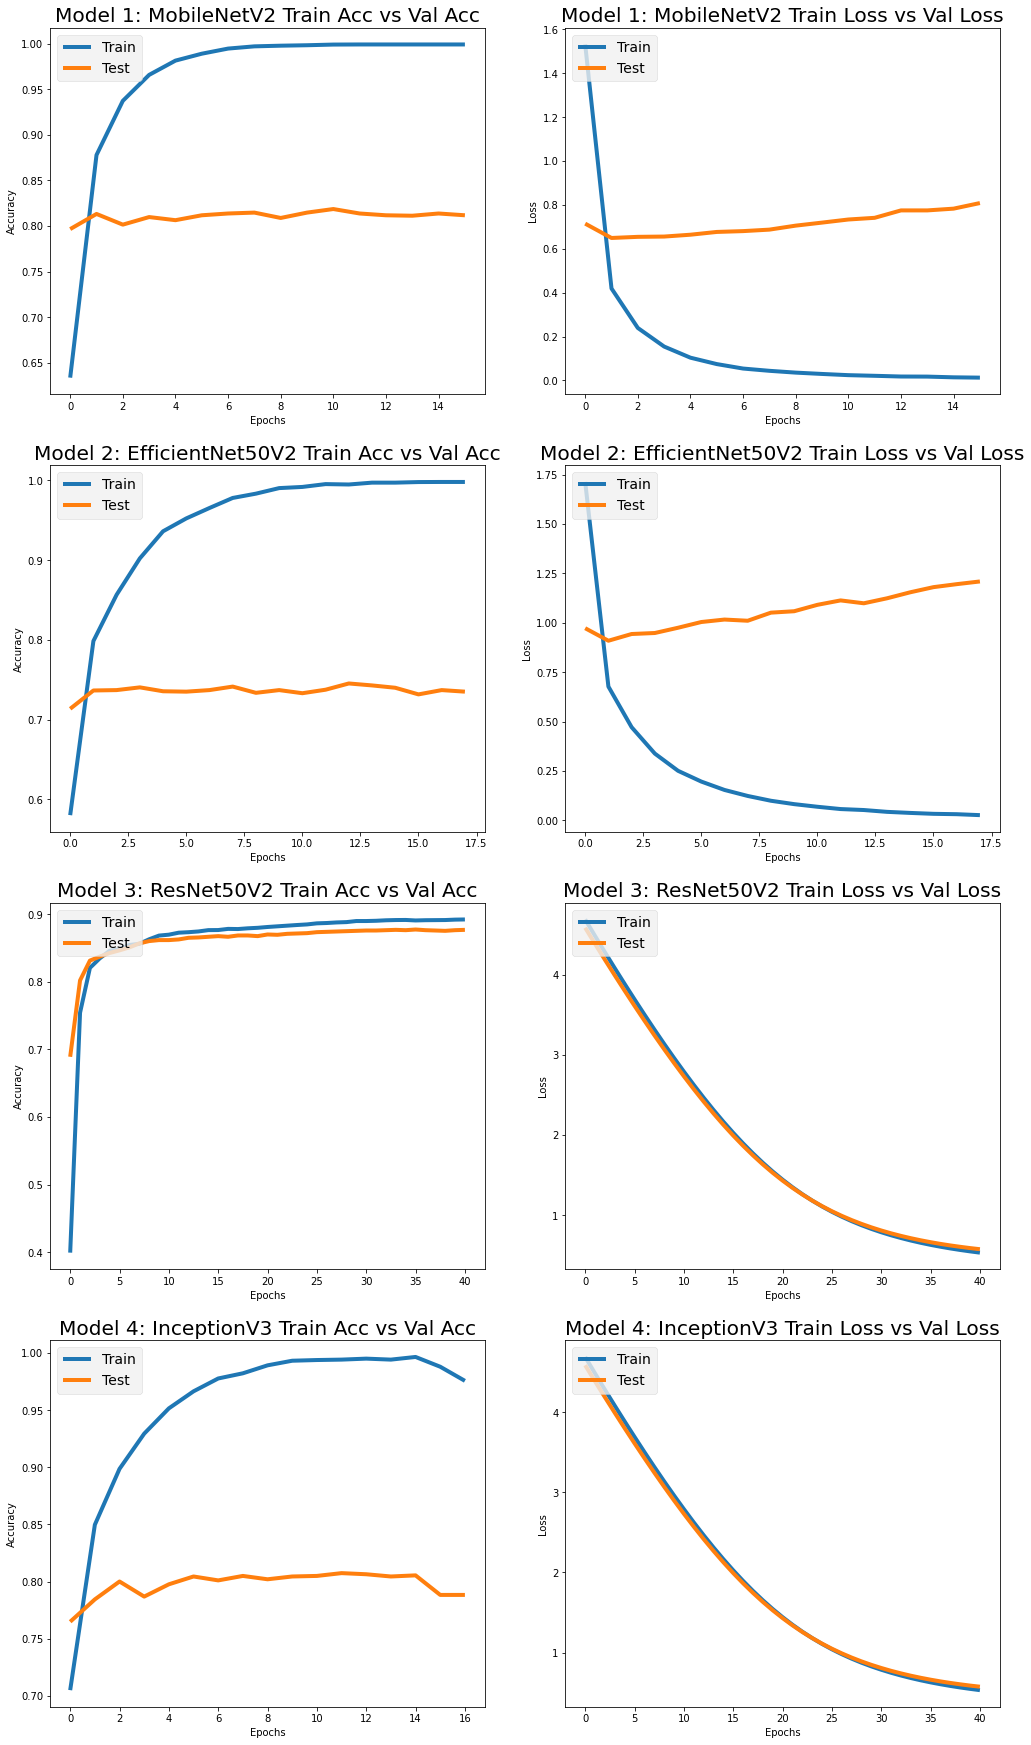

In [27]:
# Creating graphs to visualize the accuracy and loss for the models
fig, axes = plt.subplots(nrows=4, 
                         ncols=2, 
                         figsize=(15, 25))

fig.tight_layout(pad=5)

plt.style.use('fivethirtyeight')

# - *********************** - #
# Graph for MobileNetV2 Training Accuracy vs Validation Accuracy
axes[0][0].plot(history1.history['accuracy'])
axes[0][0].plot(history1.history['val_accuracy'])
axes[0][0].set_ylabel("Accuracy")
axes[0][0].set_xlabel("Epochs")
axes[0][0].set_title('Model 1: MobileNetV2 Train Acc vs Val Acc')
axes[0][0].legend(['Train', 'Test'], loc='upper left')

# Graph for MobileNetV2 Training Loss vs Validation Loss
axes[0][1].plot(history1.history['loss'])
axes[0][1].plot(history1.history['val_loss'])
axes[0][1].set_ylabel("Loss")
axes[0][1].set_xlabel("Epochs")
axes[0][1].set_title('Model 1: MobileNetV2 Train Loss vs Val Loss')
axes[0][1].legend(['Train', 'Test'], loc='upper left')
# - *********************** - #

# - *********************** - #
# Graph for EfficientNetV2 Training Accuracy vs Validation Accuracy
axes[1][0].plot(history2.history['accuracy'])
axes[1][0].plot(history2.history['val_accuracy'])
axes[1][0].set_ylabel("Accuracy")
axes[1][0].set_xlabel("Epochs")
axes[1][0].set_title('Model 2: EfficientNet50V2 Train Acc vs Val Acc')
axes[1][0].legend(['Train', 'Test'], loc='upper left')

# Graph for EfficientNetV2 Training Loss vs Validation Loss
axes[1][1].plot(history2.history['loss'])
axes[1][1].plot(history2.history['val_loss'])
axes[1][1].set_ylabel("Loss")
axes[1][1].set_xlabel("Epochs")
axes[1][1].set_title('Model 2: EfficientNet50V2 Train Loss vs Val Loss')
axes[1][1].legend(['Train', 'Test'], loc='upper left')
# - *********************** - #

# - *********************** - #
# Graph for ResNet50V2 Training Accuracy vs Validation Accuracy
axes[2][0].plot(history3.history['accuracy'])
axes[2][0].plot(history3.history['val_accuracy'])
axes[2][0].set_ylabel("Accuracy")
axes[2][0].set_xlabel("Epochs")
axes[2][0].set_title('Model 3: ResNet50V2 Train Acc vs Val Acc')
axes[2][0].legend(['Train', 'Test'], loc='upper left')

# Graph for EfficientNetV2 Training Loss vs Validation Loss
axes[2][1].plot(history3.history['loss'])
axes[2][1].plot(history3.history['val_loss'])
axes[2][1].set_ylabel("Loss")
axes[2][1].set_xlabel("Epochs")
axes[2][1].set_title('Model 3: ResNet50V2 Train Loss vs Val Loss')
axes[2][1].legend(['Train', 'Test'], loc='upper left')
# - *********************** - #

# - *********************** - #
# Graph for InceptionV3 Training Accuracy vs Validation Accuracy
axes[3][0].plot(history4.history['accuracy'])
axes[3][0].plot(history4.history['val_accuracy'])
axes[3][0].set_ylabel("Accuracy")
axes[3][0].set_xlabel("Epochs")
axes[3][0].set_title('Model 4: InceptionV3 Train Acc vs Val Acc')
axes[3][0].legend(['Train', 'Test'], loc='upper left')

# Graph for InceptionV3 Training Loss vs Validation Loss
axes[3][1].plot(history3.history['loss'])
axes[3][1].plot(history3.history['val_loss'])
axes[3][1].set_ylabel("Loss")
axes[3][1].set_xlabel("Epochs")
axes[3][1].set_title('Model 4: InceptionV3 Train Loss vs Val Loss')
axes[3][1].legend(['Train', 'Test'], loc='upper left')
# - *********************** - #

### Champion Model

In [28]:
# ResNet50V2 turns out to be the champion model
final_model = tf.keras.Sequential([
    # Layer 1 : Input Layer
    hub.KerasLayer(MODEL_URL3),
    
    # Layer 2 : Output Layer
    tf.keras.layers.Dense(120, activation='softmax')
])

# Compiling the model
final_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'],
                    optimizer=tf.keras.optimizers.Adam())

# Building the model
final_model.build(INPUT_SHAPE)

# Model Summary
final_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1001)              25612201  
_________________________________________________________________
dense_4 (Dense)              (None, 120)               120240    
Total params: 25,732,441
Trainable params: 120,240
Non-trainable params: 25,612,201
_________________________________________________________________


In [29]:
# Fitting the model
final_history = final_model.fit(train_data,
                                epochs=38)

Epoch 1/38
256/256 [==============================] - 24s 76ms/step - loss: 4.6895 - accuracy: 0.3863
Epoch 2/38
256/256 [==============================] - 19s 74ms/step - loss: 4.4838 - accuracy: 0.6993
Epoch 3/38
256/256 [==============================] - 20s 78ms/step - loss: 4.2815 - accuracy: 0.7904
Epoch 4/38
256/256 [==============================] - 20s 77ms/step - loss: 4.0821 - accuracy: 0.8272
Epoch 5/38
256/256 [==============================] - 19s 73ms/step - loss: 3.8857 - accuracy: 0.8393
Epoch 6/38
256/256 [==============================] - 21s 83ms/step - loss: 3.6928 - accuracy: 0.8506
Epoch 7/38
256/256 [==============================] - 20s 79ms/step - loss: 3.5039 - accuracy: 0.8557
Epoch 8/38
256/256 [==============================] - 20s 76ms/step - loss: 3.3189 - accuracy: 0.8613
Epoch 9/38
256/256 [==============================] - 19s 75ms/step - loss: 3.1385 - accuracy: 0.8639
Epoch 10/38
256/256 [==============================] - 20s 77ms/step - loss: 2.962

In [30]:
# Making predictions
predictions = final_model.predict(val_data,
                                  verbose=2)

# Viewing the predictions
predictions[0]

64/64 - 5s


array([5.9500616e-04, 6.0419727e-04, 6.6620664e-04, 6.4920721e-04,
       1.0485901e-03, 2.2069160e-03, 6.5623154e-03, 7.1253646e-03,
       4.7632097e-04, 5.7995884e-04, 6.6955434e-04, 6.9767766e-04,
       1.6165123e-03, 1.0253604e-03, 5.1129813e-04, 9.2863833e-04,
       7.1971864e-04, 6.0577464e-04, 6.0117140e-04, 1.6490199e-02,
       6.4659974e-04, 6.1860058e-04, 3.4552782e-03, 4.9668091e-04,
       5.3041300e-04, 5.5601681e-04, 6.3501496e-04, 1.8877824e-03,
       5.6479650e-04, 2.5843944e-02, 6.1180076e-04, 6.1676203e-04,
       5.3812133e-04, 6.7555747e-04, 5.8299187e-04, 5.6314643e-04,
       7.5357780e-04, 1.6210928e-03, 1.1762425e-02, 8.2232076e-04,
       7.0794072e-04, 5.7556439e-04, 5.3860090e-04, 5.3466175e-04,
       5.8701175e-04, 1.3266188e-03, 7.7277963e-04, 6.0949521e-04,
       5.6267151e-04, 5.0329632e-04, 6.8205700e-04, 4.8378317e-04,
       6.7909475e-04, 5.6543591e-04, 5.6851364e-04, 4.9918675e-04,
       5.4668984e-04, 5.5742241e-04, 5.6283793e-04, 5.7502778e

In [31]:
# Checking the shape of the prediction
print("Viewing the Shape : ", predictions.shape)

# Checking the maximum probability
print(f"Maximum value (probability of prediction) : {np.max(predictions[0])}")

# Maximum index
print(f"Maximum index : {np.argmax(predictions[0])}")

# Predicted label
print(f"Predicted Label : {unique_breeds[np.argmax(predictions[0])]}")

Viewing the Shape :  (2045, 120)
Maximum value (probability of prediction) : 0.8045886158943176
Maximum index : 111
Predicted Label : toy_terrier


In [32]:
# Creating a function to unbatch the data
def unbatching(data):
    '''
    This fuction is used to unbatch the data
    '''
    # Creating variables to save the images and labels
    images = []
    labels = []
    
    # Looping through the unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images, labels

# Unbatching the validation data
val_images, val_labels = unbatching(val_data)
val_images[0], val_labels[0]

(array([[[0.4615459 , 0.5478204 , 0.60272235],
         [0.4615459 , 0.5478204 , 0.60272235],
         [0.45909494, 0.5453694 , 0.60027134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45522588, 0.5415004 , 0.59640235],
         [0.45522588, 0.5415004 , 0.59640235],
         [0.4527749 , 0.5390494 , 0.59395134],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        [[0.45098042, 0.5372549 , 0.5921569 ],
         [0.45098042, 0.5372549 , 0.5921569 ],
         [0.44852945, 0.5348039 , 0.5897059 ],
         ...,
         [0.41813728, 0.5083334 , 0.56323534],
         [0.4156863 , 0.5058824 , 0.56078434],
         [0.4156863 , 0.5058824 , 0.56078434]],
 
        ...,
 
        [[0.18869358, 0.32987005, 0.42398772],
         [0.1894466 , 0.33062306, 0.42179

In [33]:
# Getting the predicted labels
predicted_labels = [unique_breeds[np.argmax(predictions[i])] for i in range(len(predictions))]

# Checking to see if the length of the predicted labels is equal to the toal number of data points in the validation dataset
if len(predicted_labels) == len(val_labels):
    print('Matched !')
else:
    print('Not Matched !')

Matched !


In [34]:
print(classification_report(val_labels, predicted_labels))

                                precision    recall  f1-score   support

                 affenpinscher       1.00      0.90      0.95        20
                  afghan_hound       1.00      0.95      0.98        22
           african_hunting_dog       1.00      0.92      0.96        26
                      airedale       0.87      0.96      0.91        27
american_staffordshire_terrier       0.50      0.42      0.45        12
                   appenzeller       0.91      0.53      0.67        19
            australian_terrier       0.69      0.69      0.69        26
                       basenji       1.00      0.95      0.97        20
                        basset       1.00      0.87      0.93        15
                        beagle       0.84      0.84      0.84        19
            bedlington_terrier       1.00      1.00      1.00        29
          bernese_mountain_dog       1.00      0.96      0.98        26
       black-and-tan_coonhound       1.00      0.71      0.83  

In [35]:
# Getting the perfromance metrics of our champion model
print("#******** ResNet50V2 Performance Metrics ********#")
print(" ")
print(f"Accuracy Score  = {accuracy_score(val_labels, predicted_labels) * 100}")
print(f"Precision Score = {precision_score(val_labels, predicted_labels, average='macro') * 100}")
print(f"Recall Score    = {recall_score(val_labels, predicted_labels, average='macro') * 100}")
print(f"F1 Score        = {f1_score(val_labels, predicted_labels, average='macro') * 100}")

#******** ResNet50V2 Performance Metrics ********#
 
Accuracy Score  = 87.53056234718827
Precision Score = 87.44355696294089
Recall Score    = 86.76061206498407
F1 Score        = 86.34268482091906
